In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

### 문제정의
- 버섯의 특징을 활용해서 식용/독성 버섯을 분류

###  데이터수집

In [2]:
data = pd.read_csv('./data/mushroom.csv')
data.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
#데이터 갯수 확인
# 행(8124개), 열(특성 22개, 정답 1개)

### 데이터 전처리

In [4]:
# 결측치 확인
data.info()
# 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
# 이상치
data.describe()
# describe() : 숫자 컬럼에서만 의미가 있음

# 문자열 컬럼
# unique : 컬럼을 구성하고 있는 문자의 가지수
# top : 어떤 데이터가 가장 많은지
# freq : top의 빈도수

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### 탐색적 데이터 분석(EDA)
- 일단 생략 : 데이터에 수치형 자료가 없기 때문

### 모델 선택 및 하이퍼파라미터 튜닝

#### 모델 불러오기

In [6]:
from sklearn.tree import DecisionTreeClassifier # 결정트리 분류모델
tree_model = DecisionTreeClassifier()

#### 데이터 나누기

##### 문제와 정답 데이터로 나누기

In [7]:
#문제
X = data.loc[:,'cap-shape':]
#정답
y = data.loc[:,'poisonous']

##### 문제(범주형)를 숫자로 만들기

In [8]:
X1 = X.copy() # 데이터 복사 : 원본 데이터에 영향을 주지 않는 복사본 데이터 생성
X1

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


##### Label 인코딩
- 하나의 값에 하나의 숫자를 대입
- 많이 사용되는 방법이 아님
    - 값을 변경함에 있어서 사용자의 개입이 들어감
    - 원래 문자가 가지고 있던 의미가 사라지고 사용자가 임의대로 값을 변경함

In [9]:
X1['cap-shape'].unique()
# 총 6개의 값을 값이 가지고있는 순서대로 번호를 부여
# 'x' : 1, 'b' : 2, 's' : 3, 'f' : 4, 'k' : 5, 'c' : 6
# => 파이썬의 인덱스 개념을 적용해서 0~5로 변경

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [10]:
# Label 인코딩 : map함수
# map() 를 적용하기 위해 딕셔너리 형태로 저장
data_map = {'x' : 0, 'b' : 1, 's' : 2, 'f' : 3, 'k' : 4, 'c' : 5}

# key 값을 value 값으로 변경
X1['cap-shape'] =X1['cap-shape'].map(data_map)

# map 함수를 사용할때 주의할점 : 가지고 있는 대상을 전부 바꿔주어야함(일부만 변경 불가능)

In [11]:
X1['cap-shape'].value_counts() # 값이 바뀐 것을 describe() 수치와 비교 확인

cap-shape
0    3656
3    3152
4     828
1     452
2      32
5       4
Name: count, dtype: int64

##### One-hot 인코딩
- 컬럼이 가지고있는 데이터만큼 컬럼을 생성
- 0과 1로 데이터를 표시
- 데이터가 늘어나는 효과를 얻음
- 일반적으로 Label Encoding보다 더 많이 사용

- Label VS One-hot
    - Label : 기존에 가지고 있던 데이터의 의미가 사라짐
    - One-hot : 장점1. 기존에 가지고있던 데이터의 의미 유지 장점2. 데이터가 늘어나는 효과 - 가지수가 많아짐

In [12]:
#One-hot 인코딩 : pd.get_dummies(대상)
X2 = X.copy()
X_onehot = pd.get_dummies(X2)
X_onehot*1

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


##### 훈련과 검증 데이터로 나누기(train/test)

In [13]:
from sklearn.model_selection import train_test_split

#훈련/검증용 데이터
X1_train,X1_test, y_train, y_test =train_test_split(X_onehot*1, y, test_size=0.3, random_state=1)
print(X1_train.shape,X1_test.shape,y_train.shape, y_test.shape)

(5686, 117) (2438, 117) (5686,) (2438,)


### 모델 학습

In [14]:
tree_model.fit(X1_train,y_train)

DecisionTreeClassifier()

### 모델 평가

In [15]:
# Decision Tree 에서 1.0 값은 과대적합
tree_model.score(X1_train, y_train)

1.0

In [16]:
# 학습용, 평가용 모두 1.0이라면?
# 1. 뭔가 잘못됐다 : 99%
# 2. 지나치게 학습이 잘됐다. : 1% ==> 구분하기 좋은 데이터로 구성되어있어서 학습이 잘 됐다.
tree_model.score(X1_test,y_test)

1.0

### 알고리즘 시각화

In [18]:
# 시각화 패키지 설치하기
# graphviz.org/download/
!pip install graphviz

                                              0.0/47.0 kB ? eta -:--:--
     --------                                 10.2/47.0 kB ? eta -:--:--
     ----------------                       20.5/47.0 kB 162.5 kB/s eta 0:00:01
     ----------------                       20.5/47.0 kB 162.5 kB/s eta 0:00:01
     ---------------------------------      41.0/47.0 kB 178.6 kB/s eta 0:00:01
     -------------------------------------- 47.0/47.0 kB 180.4 kB/s eta 0:00:00


In [90]:
# 1. 알고리즘 표현하기
# tree가 가지고 있는 알고리즘을 밖으로 내보내겠다 라는 의미 => export
tree_model1 = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=6, min_samples_split=3000, min_samples_leaf=700)
tree_model1.fit(X1_train,y_train)

from sklearn.tree import export_graphviz
export_graphviz(tree_model, # 알고리즘으로 내보낼 모델
                out_file = 'tree.dot',  # tree.dot 형태로 알고리즘을 내보낸다.
                class_names = ['p','e'], # 정답을 어떻게 표시할 것인지(한글도 지원이 되지만 마지막에 그림으로 저장 시 한글깨짐)
                feature_names = X_onehot.columns, # 기본값으로 특성의 번호를 표시, X_ounhot.columns을 입력해주어서 특성의 이름으로 표시
                impurity = True, # 불순도 기본값(지니), 엔트로피 값을 사용할 수있음
                filled = True    # class(정답) 별로 색의 변화를 줄 것인지 설정
                                  # 연한 색상은 분류는 잘 안되었지만 비슷한 계열 색상으로 표시
                )

# 이 코드의 결과로 tree.dot 파일을 생성

In [91]:
# 2. 환경변수 설정
# graphviz를 파이썬에서 사용하기 위해 폴더의 경로를 지정
import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin'

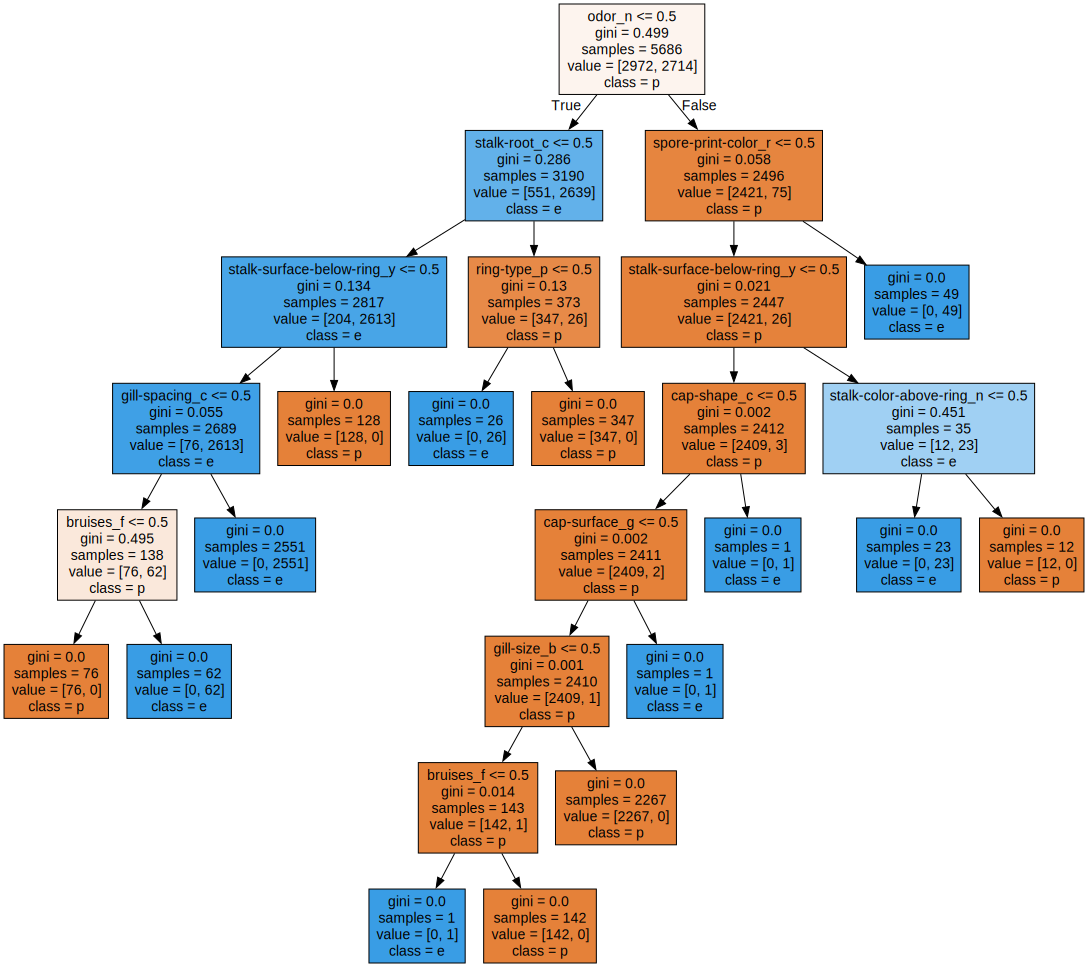

In [93]:
# 3. 알고리즘 그리기
# 1단계에서 글로 표현된 알고리즘을 그림으로 표현
import graphviz

with open('tree.dot', encoding='UTF8') as f:
    # tree.dot 파일을 열어서 f 라는 이름으로 설정
    dot_graph = f.read()
    # f 파일을 읽어서 dot_graph라는 변수에 대입

# dot_graph에 있는 내용을 그림으로 출력
display(graphviz.Source(dot_graph))

# 전체데이터 : 8124개 => 학습데이터 : 5686개

# 특성, 불순도 ==> 앞으로 질문할 특성
# samples, value(p, e), class(정답) --> 현재 내 노드의 데이터 정보
# leaf 노드를 확인해보면 더 이상 질문할 특성이 없음, 4개의 요소만 존재

In [34]:
# 4. 3단계에서 그린 그림을 파일 형태(png, jpg 등)로 저장하기
from subprocess import check_call
# check_call 값이 0이라면 정상적으로 실행되었다는 의미
check_call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png'])

0

### 교차검증
- 훈련과 평가를 여러번 진행하면서 검증의 효과를 얻기 위한 방법
- 전체 데이터가 축소되지 않기 때문에 적은 데이터에서도 효과를 얻을 수 있음

- 앞으로는 7. 평가 단계에서 교차검증 수행하기
    - 어떻게? 평가 단계에서 score() 대신 cross_val_score()로 확인하기

In [87]:
# 교차검증 라이브러리
from sklearn.model_selection import cross_val_score
score = cross_val_score(tree_model, X_onehot, y, cv=5)
score

array([1.        , 1.        , 0.99630769, 1.        , 0.98522167])

In [89]:
# mean 함수를 사용해서 평균값 확인
cross_val_score(tree_model, X_onehot, y, cv=5).mean()

0.9371925729442971

### 특성 선택
- 데이터가 엄청 많아지게 되면 데이터를 줄일 필요가 있음.
    1. 학습량이 늘어나서 시간이 많이 소요됨(성능 저하)
    2. 쓸모없는 데이터가 발생(규칙을 찾는데 도움이 안되는 데이터) --> 불필요한 계산이나 시간 소요
- 쓸모있는 데이터만 남기자.

In [44]:
tree_model

DecisionTreeClassifier()

In [95]:
# 사용한 특성의 중요도 확인
fi = tree_model.feature_importances_
fi
# 117개에 대한 중요도를 표시
# 0 ~ 1 사이의 값으로 표시
# 전체 117개의 중요도 합이 1
# 1에 가까울수록 중요한 특성

array([0.00000000e+00, 7.03472773e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.04056568e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.47699104e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.27390666e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.79908419e-02, 0.00000000e+00, 4.63710198e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.70884904e-01, 0.00000000e+00, 0.00000000e+00,
      

In [81]:
# 특성의 중요도를 확인하기 위해 데이터프레임의 형태로 변환
fi_df = pd.DataFrame(fi, index=X_onehot.columns)

#가장 많이 사용된 특성 확인하기
# 0이라는 컬럼을 기준으로 내림차순 정렬
fi_df.sort_values(by=0, ascending=False)

,0
odor_n,0.627391
stalk-root_c,0.170885
stalk-surface-below-ring_y,0.091794
spore-print-color_r,0.033148
gill-spacing_c,0.027991
...,...
gill-color_e,0.000000
gill-color_b,0.000000
gill-size_n,0.000000
gill-spacing_w,0.000000


In [86]:
# 사용된 특성만 인덱싱(불리언인덱싱)
fi_df[fi_df[0] != 0]

#실제 버섯의 독성/식용 분류에 사용된 특성은 11개
# 만약 시간이 부족해서 데이터를 줄여야한다면, 특성 중요도의 값이 작은 것 부터 없애고 학습

,0
cap-shape_c,0.000703
cap-surface_g,0.000704
bruises_f,0.024770
odor_n,0.627391
gill-spacing_c,0.027991
gill-size_b,0.000005
stalk-root_c,0.170885
stalk-surface-below-ring_y,0.091794
stalk-color-above-ring_n,0.005559
ring-type_p,0.017051
